<a href="https://colab.research.google.com/github/spyrgalaz/DNN/blob/main/bitcoin__WEBSCRAPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scraping HISTORICAL Bitcoin prices from coinmarketcap.com 

In [1]:
### Install Dependencies for Colab 

!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
! pip install XlsxWriter
! pip install xlrd
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 8.6MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


# New Section

In [2]:
import pandas as pd
from pandas import DataFrame
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
from openpyxl import Workbook
import xlsxwriter

In [3]:
## retrieve html
url = "https://coinmarketcap.com/currencies/bitcoin/historical-data/"
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [4]:
## retrieve all <tr>
containers = soup.findAll('tr')

In [5]:
## delete first blank raw
containers=containers[1:]

In [6]:
## retrieve <td> within the row to extract : 'Date','Open','High','LOW','Close','Volume','Market_Cap'
my_list=[]
tot=0
for item in containers :
    p0=item.findAll('td')[0].get_text().strip()
    p1=item.findAll('td')[1].get_text().strip()
    p2=item.findAll('td')[2].get_text().strip()
    p3=item.findAll('td')[3].get_text().strip()
    p4=item.findAll('td')[4].get_text().strip()
    p5=item.findAll('td')[5].get_text().strip()
    p6=item.findAll('td')[6].get_text().strip()
    my_list.append([p0,p1,p2,p3,p4,p5,p6])

    tot=tot+1

print(tot)   

58


In [7]:
df=pd.DataFrame(my_list,columns=['Date','Open','High','LOW','Close','Volume','Market_Cap'])

In [8]:
df.head()

,Date,Open,High,LOW,Close,Volume,Market_Cap
0,"Mar 27, 2021","$55,137.57","$56,568.22","$54,242.91","$55,973.51","$47,266,542,233","$1,044,814,147,412"
1,"Mar 26, 2021","$51,683.01","$55,137.31","$51,579.86","$55,137.31","$56,652,197,978","$1,029,150,697,411"
2,"Mar 25, 2021","$52,726.75","$53,392.39","$50,856.57","$51,704.16","$67,999,812,841","$965,028,762,666"
3,"Mar 24, 2021","$54,710.49","$57,262.38","$52,514.33","$52,774.26","$70,567,223,787","$984,948,142,898"
4,"Mar 23, 2021","$54,511.66","$55,985.44","$53,470.69","$54,738.94","$56,435,023,914","$1,021,563,479,682"


In [9]:
# Convert strings to numerical and Date to datetime
df['Date']=df['Date'].str.replace(',', '')
df['Date']=df['Date'].str.replace(' ', '-')
df['Date'] = pd.to_datetime(df['Date'], format='%b-%d-%Y')
df['Open']=df['Open'].str.strip('$').str.replace(',', '').astype(float)
df['High']=df['High'].str.strip('$').str.replace(',', '').astype(float)
df['LOW']=df['LOW'].str.strip('$').str.replace(',', '').astype(float)
df['Close']=df['Close'].str.strip('$').str.replace(',', '').astype(float)
df['Volume']=df['Volume'].str.strip('$').str.replace(',', '').astype(float)
df['Market_Cap']=df['Market_Cap'].str.strip('$').str.replace(',', '').astype(float)

In [10]:
# check the changes
df.head()

,Date,Open,High,LOW,Close,Volume,Market_Cap
0,2021-03-27,55137.57,56568.22,54242.91,55973.51,4.726654e+10,1.044814e+12
1,2021-03-26,51683.01,55137.31,51579.86,55137.31,5.665220e+10,1.029151e+12
2,2021-03-25,52726.75,53392.39,50856.57,51704.16,6.799981e+10,9.650288e+11
3,2021-03-24,54710.49,57262.38,52514.33,52774.26,7.056722e+10,9.849481e+11
4,2021-03-23,54511.66,55985.44,53470.69,54738.94,5.643502e+10,1.021563e+12


In [11]:
#Download excel file
export_excel = df.to_excel ('Bitcoin_web_scrapping.xlsx')
from google.colab import files
files.download('Bitcoin_web_scrapping.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

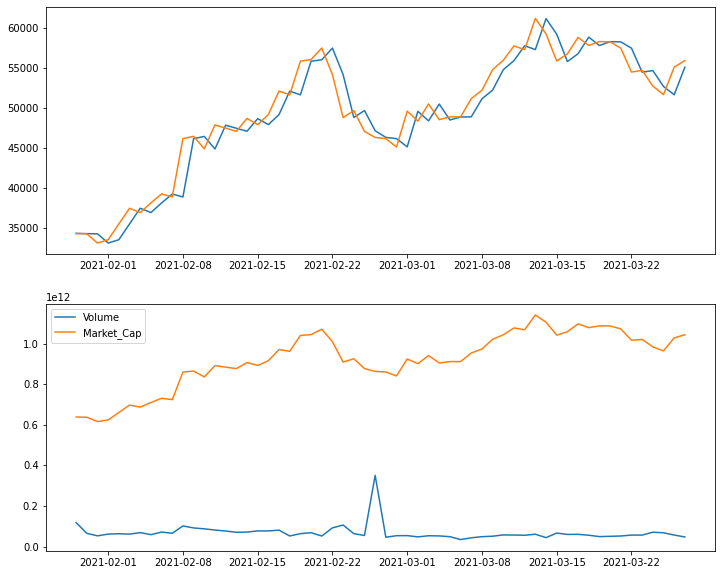

In [13]:
# Visualize the data
fig, axs = plt.subplots(2)
axs[1].plot(df['Date'],df['Volume'],label='Volume')
axs[1].plot(df['Date'],df['Market_Cap'],label='Market_Cap')
axs[0].plot(df['Date'],df['Open'],label='Open')
axs[0].plot(df['Date'],df['Close'],label='Close')
plt.gcf().set_size_inches(12, 10)
plt.legend()
plt.show()